In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
btc_df = pd.read_csv(
    Path("Project_2/BTCUSD_4h.csv"),
    index_col = "Date", 
    parse_dates = True, 
    infer_datetime_format = True
)

In [3]:
btc_df['returns'] = np.log(btc_df.Close.pct_change() +1)

In [4]:
btc_df['direction'] = [1 if i > 0 else -1 for i in btc_df.returns]

In [5]:
def logit(btc_df, lags):
    names = []
    for i in range (1,lags +1):
        btc_df['Lag_'+str(i)] = btc_df['returns'].shift(i)
        btc_df['Lag_'+str(i)+'_dir'] = [1 if j > 0 else -1 for j in btc_df['Lag_'+str(i)]]
        names.append('Lag_'+str(i)+'_dir')
    return names

In [6]:
dirnames = logit(btc_df, 2) 

In [7]:
btc_df.dropna(inplace=True)

In [8]:
model = LogisticRegression()

In [9]:
model.fit(btc_df[dirnames], btc_df['direction'])

LogisticRegression()

In [10]:
btc_df['prediction_logit'] = model.predict(btc_df[dirnames])

In [11]:
btc_df['strategy_logit']=btc_df['prediction_logit']*btc_df['returns']

In [12]:
np.exp(btc_df[['returns','strategy_logit']].sum())

returns            3.49316
strategy_logit    10.96367
dtype: float64

<AxesSubplot:xlabel='Date'>

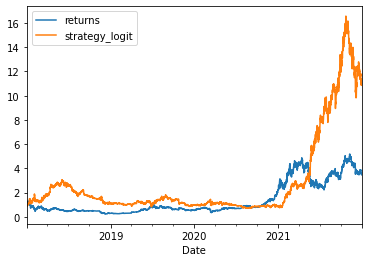

In [13]:
np.exp(btc_df[['returns','strategy_logit']].cumsum()).plot()

In [14]:
train, test= train_test_split(btc_df, shuffle=False, test_size=0.25, random_state=0)

In [15]:
model = LogisticRegression()

In [16]:
model.fit(train[dirnames], train['direction'])

LogisticRegression()

In [17]:
test['prediction_logit'] = model.predict(test[dirnames])

In [18]:
test['strategy_logit'] = test['prediction_logit']*test['returns']

In [19]:
np.exp(test[['returns','strategy_logit']].sum())

returns            1.599658
strategy_logit    12.575825
dtype: float64

<AxesSubplot:xlabel='Date'>

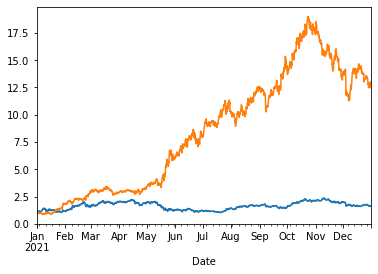

In [24]:
ax=np.exp(test['returns'].cumsum()).plot()
np.exp(test['strategy_logit'].cumsum()).plot(ax=ax)

In [21]:
metrics.confusion_matrix(test['direction'], test['prediction_logit'])

array([[612, 460],
       [507, 612]])

In [22]:
print(metrics.classification_report(test['direction'], test['prediction_logit']))

              precision    recall  f1-score   support

          -1       0.55      0.57      0.56      1072
           1       0.57      0.55      0.56      1119

    accuracy                           0.56      2191
   macro avg       0.56      0.56      0.56      2191
weighted avg       0.56      0.56      0.56      2191

